In [18]:
import pandas as pd
df = pd.read_csv('../data/NIST_database_onlyH_6TypeEq_pos_match_max_fg_other.csv')
df.head()

,Metal ion,Ligand,Formula,Ligand class,Equilibrium,Temperature (C),Ionic strength,Value type,Value,Note,...,PyridineCount,MonoPhosphateCount,ImidazoleNHCount,CyclicAmineCount,Ligand_class_id,molecular_weight,HBD,HBA,logP,TPSA
0,H⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[HL]/[L][H],25,0.10,Log K,9.57,NaN,...,0,0,0,0,0,75.067,2,2,-0.9703,63.32
1,H⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[HL]/[L][H],37,0.15,Log K,9.25,NaN,...,0,0,0,0,0,75.067,2,2,-0.9703,63.32
2,H⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[HL]/[L][H],25,0.50,Log K,9.54,NaN,...,0,0,0,0,0,75.067,2,2,-0.9703,63.32
3,H⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[HL]/[L][H],25,0.70,Log K,9.59,NaN,...,0,0,0,0,0,75.067,2,2,-0.9703,63.32
4,H⁺,Aminoacetic acid (Glycine),C2H5N1O2,Amino Acids,[HL]/[L][H],25,1.00,Log K,9.66,NaN,...,0,0,0,0,0,75.067,2,2,-0.9703,63.32


In [20]:
df = pd.DataFrame(df["SMILES"].unique(), columns=["SMILES"])
with open("../data/NIST_database_smiles_unique.txt", "w") as f:
    for smiles in df["SMILES"]:
        f.write(f"{smiles}\n")

In [3]:
df1 = df[df['max_eq_num'] == 1]
df2 = df[df['max_eq_num'] == 2]
df3 = df[df['max_eq_num'] == 3]
df4 = df[df['max_eq_num'] == 4]
df5 = df[df['max_eq_num'] == 5]
df6 = df[df['max_eq_num'] == 6]

df1.to_csv("../data/NIST_database_diss_1.csv", index=False)
df2.to_csv("../data/NIST_database_diss_2.csv", index=False)
df3.to_csv("../data/NIST_database_diss_3.csv", index=False)
df4.to_csv("../data/NIST_database_diss_4.csv", index=False)
df5.to_csv("../data/NIST_database_diss_5.csv", index=False)
df6.to_csv("../data/NIST_database_diss_6.csv", index=False)



In [5]:
df = df['SMILES']
df.to_csv("../data/NIST_database_smiles.csv", index=False)

---

In [9]:
import pandas as pd
df_diss = pd.read_csv("../data/nist_pka_data.csv")
df_diss.head()

,SMILES,pKa,Dissociable_Atoms,Functional_Group,Name
0,NCC(O)=O,9.57,0:2,amine_primary:carboxylic_acid,Aminoacetic acid (Glycine)
1,NCC(O)=O,9.25,0:2,amine_primary:carboxylic_acid,Aminoacetic acid (Glycine)
2,NCC(O)=O,9.54,0:2,amine_primary:carboxylic_acid,Aminoacetic acid (Glycine)
3,NCC(O)=O,9.59,0:2,amine_primary:carboxylic_acid,Aminoacetic acid (Glycine)
4,NCC(O)=O,9.66,0:2,amine_primary:carboxylic_acid,Aminoacetic acid (Glycine)


In [15]:
# # 計算Dissociable_Atoms為空的記錄數量
# empty_dissociable_atoms = df_diss[(df_diss['Dissociable_Atoms'] == 0)].shape[0]
# print(f"Dissociable_Atoms為空的記錄數量: {empty_dissociable_atoms}")
# 計算Functional_Group為"unknown"的記錄數量
unknown_functional_group = df_diss[df_diss['Functional_Group'] == 'unknown'].shape[0]
print(f"Functional_Group為'unknown'的記錄數量: {unknown_functional_group}")


Functional_Group為'unknown'的記錄數量: 138


In [21]:
# 讀取錯誤日誌文件
with open("../data/nist_pka_data_errors.log", "r") as f:
    error_lines = f.readlines()

# 提取所有包含"無法識別解離位點:"的行
error_smiles_lines = [line.strip() for line in error_lines if "無法識別解離位點:" in line]

# 從這些行中提取SMILES字串
error_smiles = [line.split(": ")[1] for line in error_smiles_lines]

# 獲取獨立的SMILES字串（去重）
unique_error_smiles = list(set(error_smiles))

# 打印獨立的SMILES字串數量和前10個例子
print(f"獨立的SMILES字串總數: {len(unique_error_smiles)}")

with open("../data/nist_pka_data_errors_unique.log", "w") as f:
    for smiles in unique_error_smiles:
        f.write(f"{smiles}\n")

獨立的SMILES字串總數: 15


In [22]:
df_ori = pd.read_csv('../data/NIST_database_onlyH_6TypeEq_pos_match_max_fg_other.csv')

# 讀取錯誤SMILES列表
with open("../data/nist_pka_data_errors_unique.log", "r") as f:
    error_smiles_list = [line.strip() for line in f.readlines()]

# 在原始數據中查詢這些SMILES對應的Ligand Class
error_compounds = []
for smiles in error_smiles_list:
    matches = df_ori[df_ori['SMILES'] == smiles]
    if not matches.empty:
        for _, row in matches.iterrows():
            error_compounds.append({
                'Ligand Class': row['Ligand class'] if 'Ligand class' in row else 'Unknown',
                'SMILES': smiles,
                'Ligand': row['Ligand'] if 'Ligand' in row else 'Unknown'
            })
    else:
        error_compounds.append({
            'Ligand Class': 'Not Found',
            'SMILES': smiles,
            'Ligand': 'Not Found'
        })

# 將結果保存到新檔案
error_df = pd.DataFrame(error_compounds)
error_df = error_df.drop_duplicates(subset=['SMILES'])
error_df = error_df.sort_values(by='Ligand Class')
error_df.to_csv('../data/nist_pka_errors_with_class.csv', index=False)
print(f"已將{len(error_compounds)}個錯誤SMILES的Ligand Class資訊保存到檔案")


已將24個錯誤SMILES的Ligand Class資訊保存到檔案


---

In [23]:
# nist_pka_data
nist_pka_data = pd.read_csv("../data/nist_pka_data.csv")
nist_pka_data = nist_pka_data[nist_pka_data['Functional_Group'] != 'unknown']
nist_pka_data.to_csv("../data/nist_pka_data_clean.csv", index=False)

In [5]:
import pandas as pd
# 讀取包含解離順序的數據
df_with_order = pd.read_csv("../data/nist_pka_data_with_order.csv")

# 通過檢查Dissociable_Atoms中的冒號數量來判斷解離原子數量
# 篩選出不同數量解離原子的數據
binary_df = df_with_order[df_with_order['Dissociable_Atoms'].str.count(':') == 1]
print(f"\n篩選出{len(binary_df)}行只有兩個解離原子的數據")
binary_df.to_csv("../data/nist_pka_data_binary_dissociation.csv", index=False)
print(f"已將二元解離數據保存至 ../data/nist_pka_data_binary_dissociation.csv")

# 生成1~6個解離原子的數據檔案
for i in range(1, 7):
    # 對於1個解離原子，冒號數量為0；對於n個解離原子，冒號數量為n-1
    colon_count = i - 1
    filtered_df = df_with_order[df_with_order['Dissociable_Atoms'].str.count(':') == colon_count]
    output_path = f"../data/nist_pka_data_{i}_dissociation.csv"
    filtered_df.to_csv(output_path, index=False)
    print(f"已將{i}個解離原子的數據{len(filtered_df)}行保存至 {output_path}")



篩選出2923行只有兩個解離原子的數據
已將二元解離數據保存至 ../data/nist_pka_data_binary_dissociation.csv
已將1個解離原子的數據1980行保存至 ../data/nist_pka_data_1_dissociation.csv
已將2個解離原子的數據2923行保存至 ../data/nist_pka_data_2_dissociation.csv
已將3個解離原子的數據903行保存至 ../data/nist_pka_data_3_dissociation.csv
已將4個解離原子的數據712行保存至 ../data/nist_pka_data_4_dissociation.csv
已將5個解離原子的數據108行保存至 ../data/nist_pka_data_5_dissociation.csv
已將6個解離原子的數據92行保存至 ../data/nist_pka_data_6_dissociation.csv


In [3]:
import pandas as pd

In [4]:
f = '/work/u5066474/NTHU/LiveTransForM-main/OMGNN/data/nist_pka_data_with_order.csv'
df = pd.read_csv(f)




In [ ]:
# nist_pka_data
nist_pka_data = pd.read_csv("../data/nist_pka_data.csv")
nist_pka_data = nist_pka_data[nist_pka_data['Functional_Group'] != 'unknown']
nist_pka_data.to_csv("../data/nist_pka_data_clean.csv", index=False)

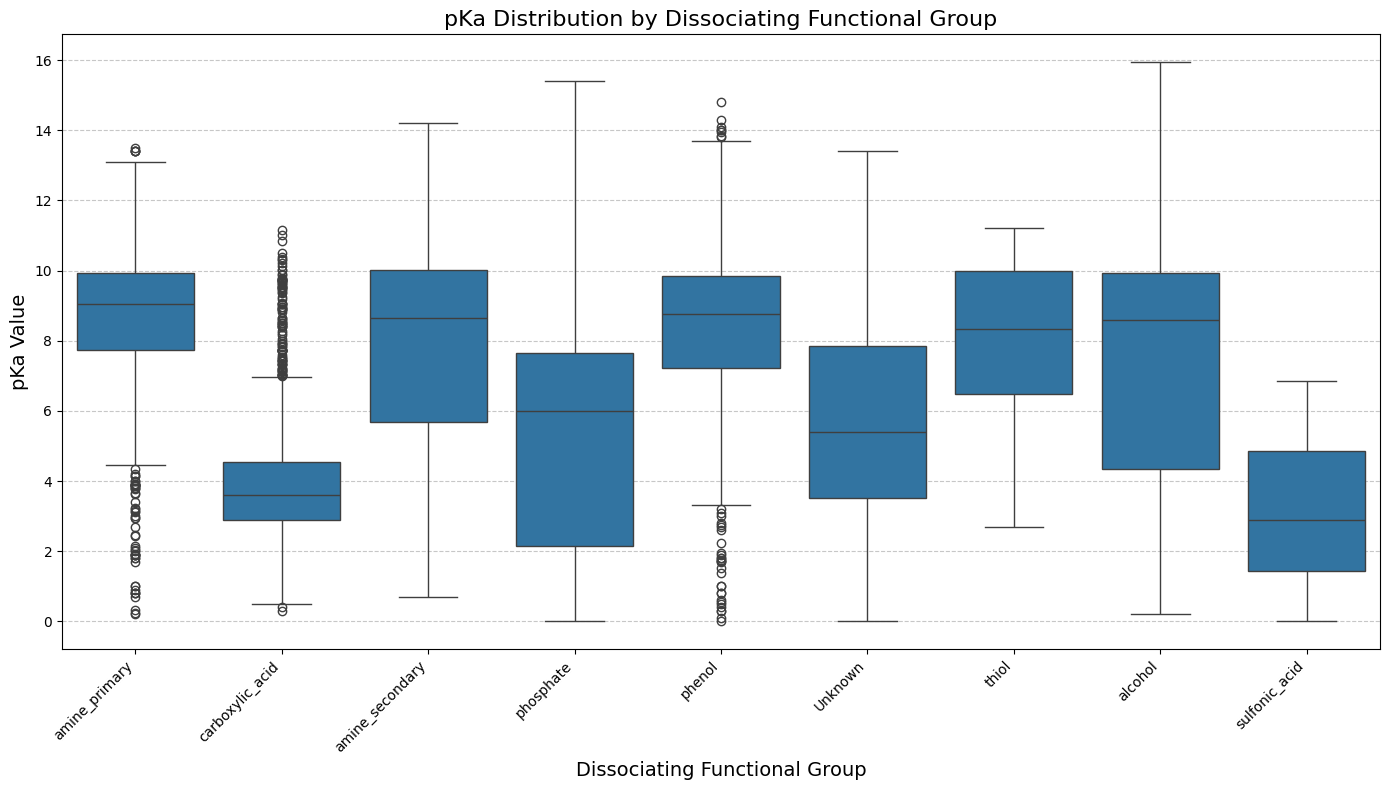

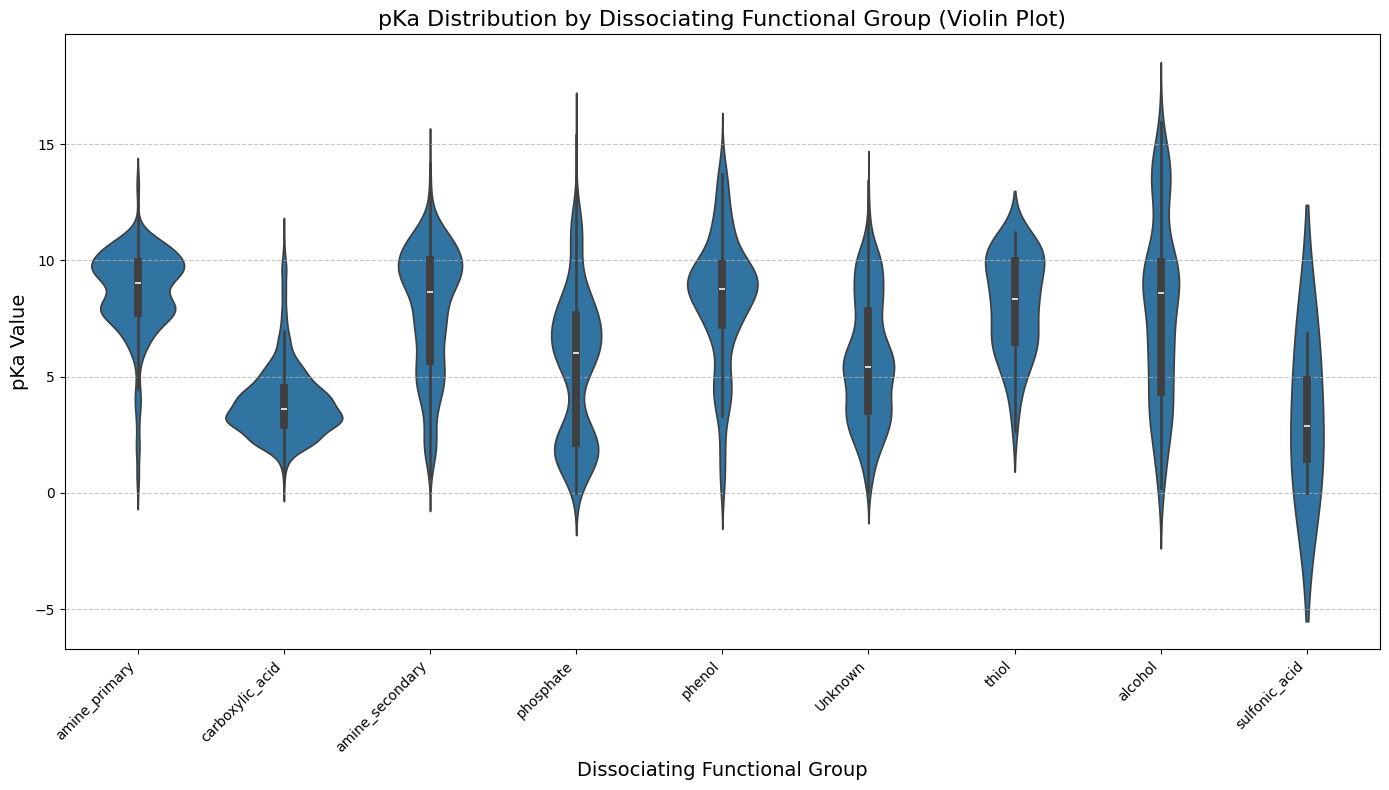


各官能團的平均pKa值和計數:
                    Mean pKa  Count
Dissociating_Group                 
sulfonic_acid       3.246667      3
carboxylic_acid     3.882747   2270
phosphate           5.461515    491
Unknown             5.652044   1136
amine_secondary     7.842471    675
alcohol             7.891121    232
thiol               8.093295     78
phenol              8.336405    595
amine_primary       8.630112   1242


/tmp/ipykernel_2091661/346298343.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pka_stats.index, y=pka_stats['Mean pKa'], palette='viridis')


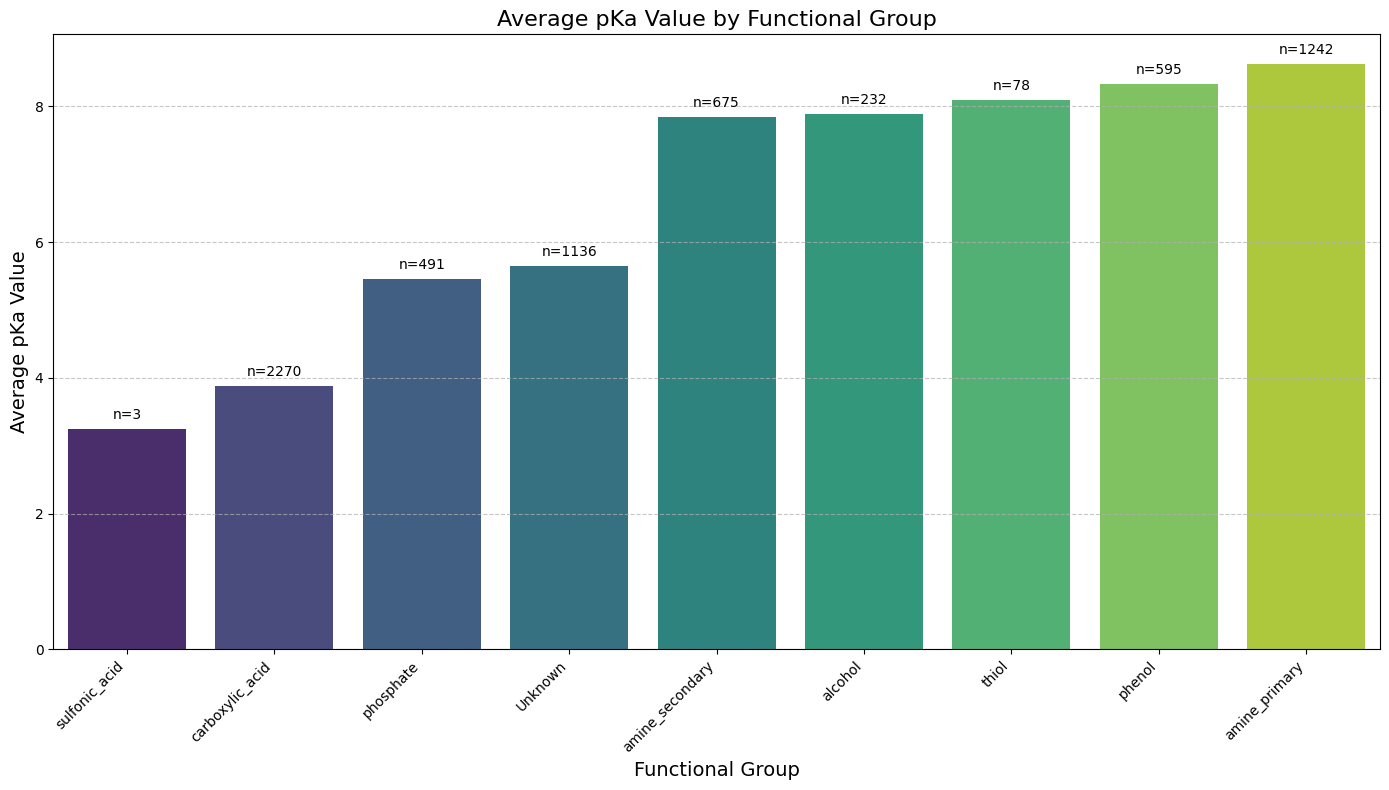


各官能團中的異常值SMILES:

amine_primary 官能團的異常值:
SMILES: N[C@@H](Cc1ccc(O)c(O)c1)C(O)=O, pKa: 13.4
SMILES: N[C@@H](Cc1ccc(O)c(O)c1)C(O)=O, pKa: 13.4
SMILES: NCC[S](O)(=O)=O, pKa: 0.33
SMILES: NCCc1ccc(O)c(O)c1, pKa: 13.4
SMILES: NCCc1ccc(O)c(O)c1, pKa: 13.4
SMILES: NCC(N)=NO, pKa: 2.47
SMILES: NON=C(N)C=NO, pKa: 2.95
SMILES: NCC(N)CN, pKa: 3.66
SMILES: NCC(N)CN, pKa: 3.99
SMILES: NCCNCC(F)(F)CNCCN, pKa: 2.42
SMILES: NCCN1CCCNCCNCCNCCC1, pKa: 1.9
SMILES: NCCCN1CCCNCCNCCNCCC1, pKa: 3.64
SMILES: NC1=NC(=O)N(C=C1)C2OC(CO[P](O)(=O)O[P](O)(O)=O)C(O)C2O, pKa: 1.0
SMILES: Nc1ncnc2n(cnc12)C3OC(CO[P](O)(=O)O[P](O)(O)=O)C(O)C3O, pKa: 3.87
SMILES: Nc1ncnc2n(cnc12)C3OC(CO[P](O)(=O)O[P](O)(O)=O)C(O)C3O, pKa: 3.76
SMILES: Nc1ncnc2n(cnc12)C3OC(CO[P](O)(=O)O[P](O)(O)=O)C(O)C3O, pKa: 3.88
SMILES: Nc1ncnc2n(cnc12)C3OC(CO[P](O)(=O)O[P](O)(O)=O)C(O)C3O, pKa: 3.89
SMILES: Nc1ncnc2n(cnc12)C3OC(CO[P](O)(=O)O[P](O)(O)=O)C(O)C3O, pKa: 3.9
SMILES: Nc1ncnc2n(cnc12)C3OC(CO[P](O)(=O)O[P](O)(O)=O)C(O)C3O, pKa: 4.2
SMILES: 

[18:35:14] WARNING: not removing hydrogen atom without neighbors
[18:35:14] WARNING: not removing hydrogen atom without neighbors
/home/u5066474/miniconda3/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


TypeError: Image data of dtype object cannot be converted to float

/home/u5066474/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 23448 (\N{CJK UNIFIED IDEOGRAPH-5B98}) missing from current font.
  func(*args, **kwargs)
/home/u5066474/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  func(*args, **kwargs)
/home/u5066474/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22296 (\N{CJK UNIFIED IDEOGRAPH-5718}) missing from current font.
  func(*args, **kwargs)
/home/u5066474/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  func(*args, **kwargs)
/home/u5066474/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from current font.
  func(*args, **kwargs)
/home/u5066474/miniconda3/lib/python3.9/site-packa

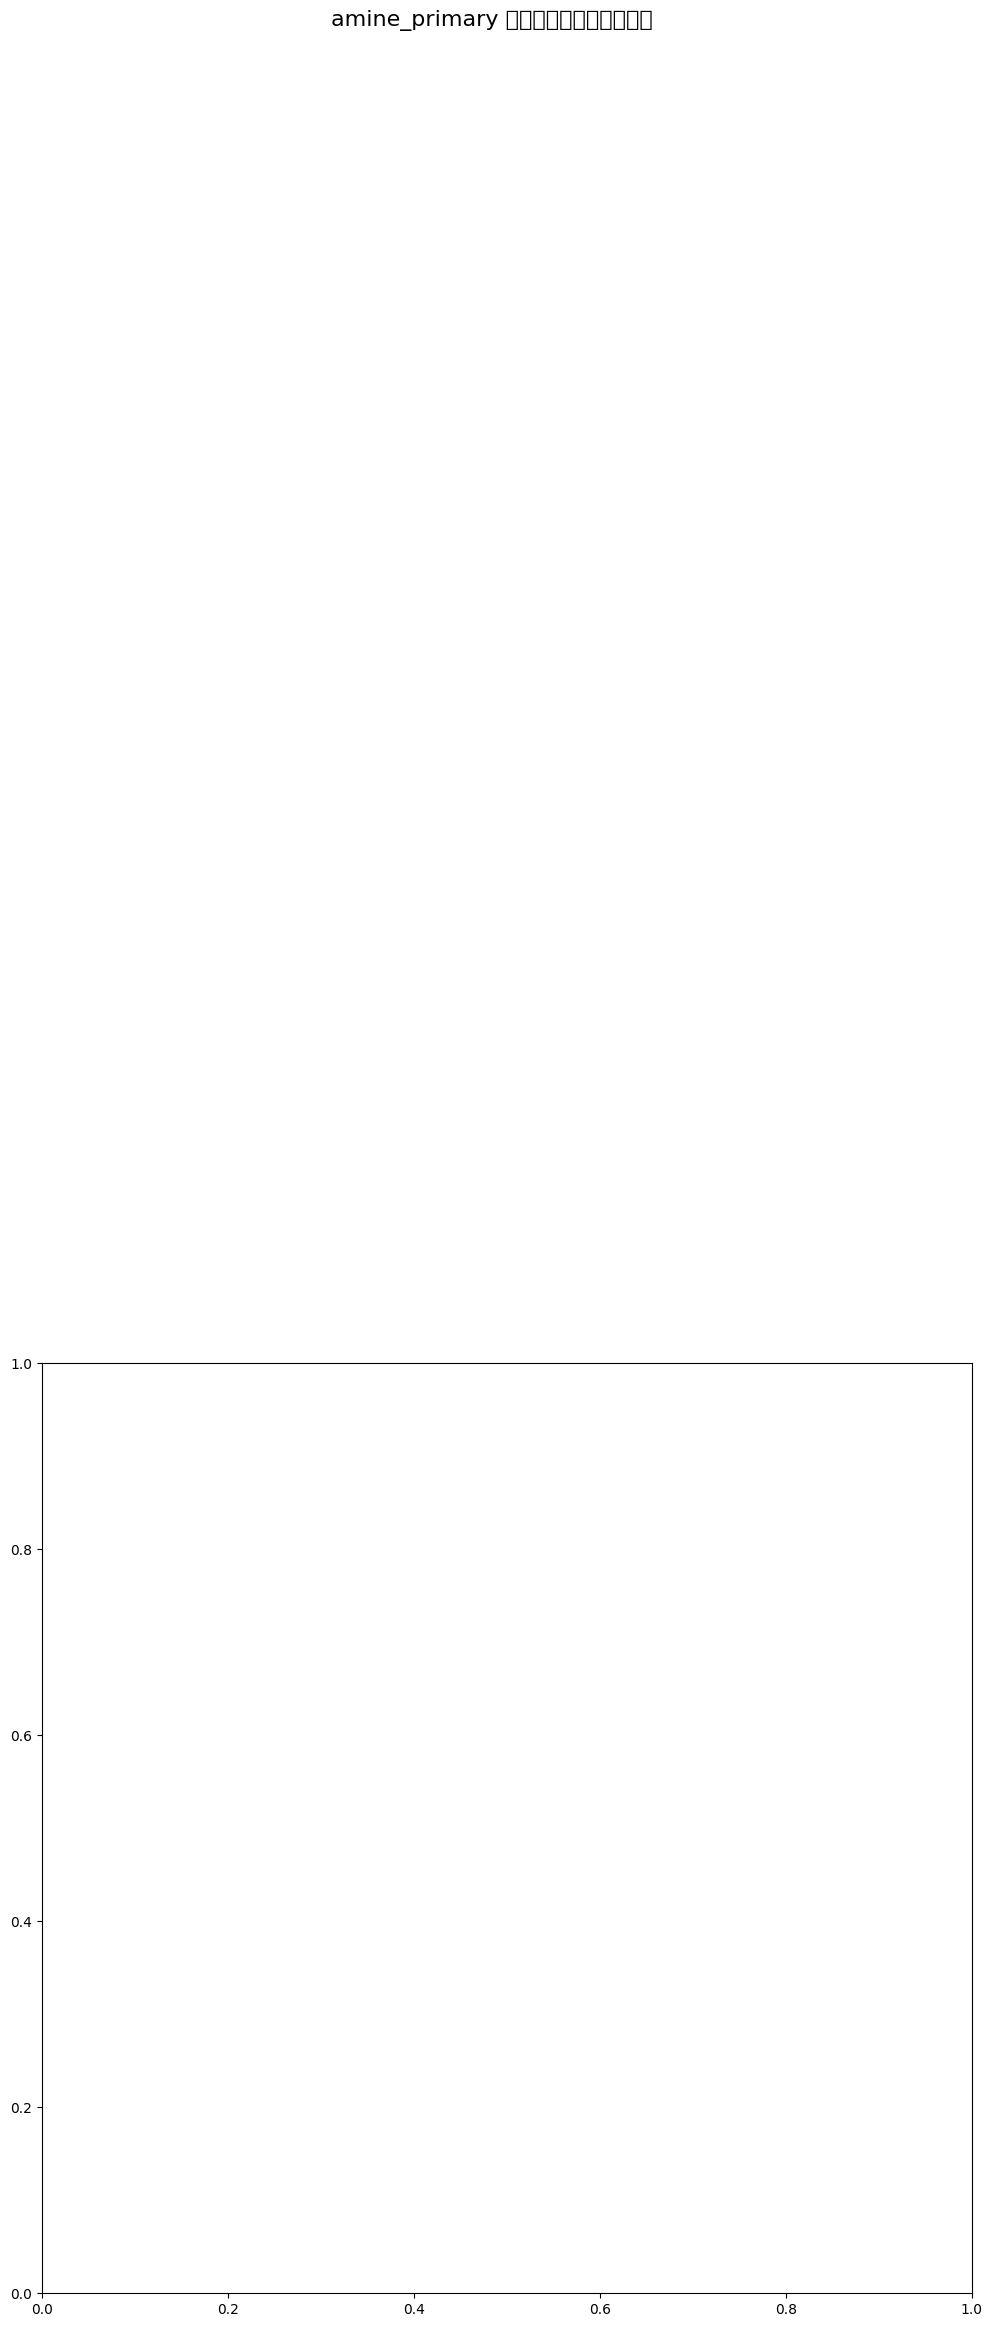

In [16]:
# 讀取包含解離順序的數據
df_order = pd.read_csv('../data/nist_pka_data_2_order.csv')
df_order = df_order[df_order['Functional_Group'] != 'unknown']
# # 檢查數據
# print("數據形狀:", df_order.shape)
# print("列名:", df_order.columns.tolist())
# print("前5行示例:")
# print(df_order.head())

# 使用基本設定，避免中文字型問題
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 重設字型設定，使用默認字型
plt.rcParams.update({'font.family': 'sans-serif'})

# 將'未知'改為'Unknown'，避免中文顯示問題
df_order['Dissociating_Group'] = df_order['Dissociating_Group'].replace('未知', 'Unknown')

# 分析不同解離官能團的pKa分佈
plt.figure(figsize=(14, 8))
sns.boxplot(x='Dissociating_Group', y='pKa', data=df_order)
plt.title('pKa Distribution by Dissociating Functional Group', fontsize=16)
plt.xlabel('Dissociating Functional Group', fontsize=14)
plt.ylabel('pKa Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../data/pka_distribution_by_functional_group.png', dpi=300)
plt.show()

# 繪製小提琴圖以更好地顯示分佈
plt.figure(figsize=(14, 8))
sns.violinplot(x='Dissociating_Group', y='pKa', data=df_order, inner='box')
plt.title('pKa Distribution by Dissociating Functional Group (Violin Plot)', fontsize=16)
plt.xlabel('Dissociating Functional Group', fontsize=14)
plt.ylabel('pKa Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../data/pka_violin_by_functional_group.png', dpi=300)
plt.show()

# 計算每個官能團的平均pKa值
mean_pka = df_order.groupby('Dissociating_Group')['pKa'].mean().sort_values()
count_pka = df_order.groupby('Dissociating_Group')['pKa'].count()

# 創建包含計數的表格
pka_stats = pd.DataFrame({
    'Mean pKa': mean_pka,
    'Count': count_pka
}).sort_values('Mean pKa')

print("\n各官能團的平均pKa值和計數:")
print(pka_stats)

# 繪製平均pKa值的條形圖
plt.figure(figsize=(14, 8))
sns.barplot(x=pka_stats.index, y=pka_stats['Mean pKa'], palette='viridis')
plt.title('Average pKa Value by Functional Group', fontsize=16)
plt.xlabel('Functional Group', fontsize=14)
plt.ylabel('Average pKa Value', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 在每個條形上添加計數標籤
for i, (idx, row) in enumerate(pka_stats.iterrows()):
    plt.text(i, row['Mean pKa'] + 0.1, f"n={int(row['Count'])}", 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../data/average_pka_by_functional_group.png', dpi=300)
plt.show()

# 找出異常值
# 使用IQR方法識別每個官能團中的異常值
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import math
import numpy as np

outliers = {}
for group in df_order['Dissociating_Group'].unique():
    group_data = df_order[df_order['Dissociating_Group'] == group]
    q1 = group_data['pKa'].quantile(0.25)
    q3 = group_data['pKa'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # 找出異常值
    group_outliers = group_data[(group_data['pKa'] < lower_bound) | (group_data['pKa'] > upper_bound)]
    if not group_outliers.empty:
        outliers[group] = group_outliers

# 輸出異常值的SMILES並繪製分子結構
print("\n各官能團中的異常值SMILES:")
for group, outlier_df in outliers.items():
    print(f"\n{group} 官能團的異常值:")
    
    # 將SMILES轉換為分子對象
    mols = []
    legends = []
    for idx, row in outlier_df.iterrows():
        print(f"SMILES: {row['SMILES']}, pKa: {row['pKa']}")
        mol = Chem.MolFromSmiles(row['SMILES'])
        if mol:
            mols.append(mol)
            legends.append(f"pKa: {row['pKa']:.2f}")
    
    # 繪製分子結構
    if mols:
        # 計算子圖的行列數
        n_mols = len(mols)
        n_cols = min(4, n_mols)  # 最多4列
        n_rows = math.ceil(n_mols / n_cols)
        
        # 繪製分子結構
        plt.figure(figsize=(3*n_cols, 2.5*n_rows))
        plt.suptitle(f"{group} 官能團的異常值分子結構", fontsize=16)
        
        # 使用Draw.MolsToGridImage生成圖像，然後將其轉換為numpy數組
        img = Draw.MolsToGridImage(mols, molsPerRow=n_cols, subImgSize=(200, 200), 
                                  legends=legends, useSVG=False)
        # 將PIL圖像轉換為numpy數組
        img_array = np.array(img)
        plt.imshow(img_array)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(f"../data/outliers_{group.replace(' ', '_')}.png", dpi=300)
        plt.show()